
# 다변량 회귀 모델 
nbastat.csv에서 야투 시도 횟수 (FGA), 3점슛 시도 횟수 (3PA), 자유투 시도 횟수 (FTA)
로부터 득점수 (PTS)를 예측하는 모델을 만들고 이를 훈련시키시오.

### 가설

y = 세타0 + 세타1(x1) + 세타2(x2) + 세타3(x3)

1. library import

In [131]:
import numpy as np
import pandas as pd

2. 드라이브 마운트 및 csv파일 업로드

In [132]:
from google.colab import drive
from google.colab import files

drive.mount('/lecture-2023ai')
files.upload()
nbastat = pd.read_csv('nbastat2022.csv')

Drive already mounted at /lecture-2023ai; to attempt to forcibly remount, call drive.mount("/lecture-2023ai", force_remount=True).


Saving nbastat2022.csv to nbastat2022 (1).csv


3. 행 수와 컬럼 선택해보기

In [166]:
m = len(nbastat)

x1 = nbastat[['FGA']]  # 야투 시도 횟수
x2 = nbastat[['3PA']]  # 3점슛 시도 횟수
x3 = nbastat[['FTA']] # 자유투 시도 횟수
y = nbastat[['PTS']] # 득점수

print(m, type(x1), type(x2), type(x3), type(y))

249 <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


4. 결측값 처리

In [167]:
x1 = x1.fillna(0)
x2 = x2.fillna(0)
x3 = x3.fillna(0)
y = y.fillna(0)

5. Numpy의 ndarray 형태로 변환


In [168]:
# Numpy로 변환
x1 = (np.array(x1)).reshape(m, 1)
x2 = (np.array(x2)).reshape(m, 1)
x3 = (np.array(x3)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)

6. 그래프로 그려보기

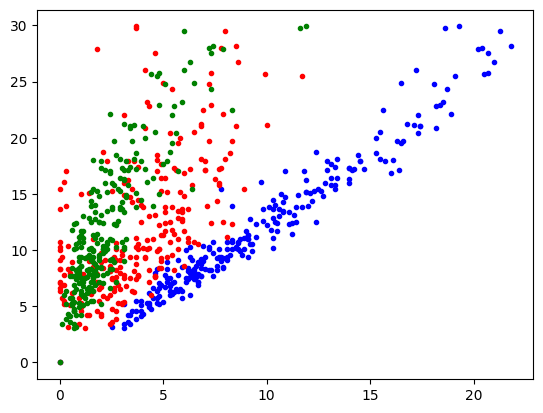

In [216]:
# 그려보기
import matplotlib.pyplot as plt
plt.plot(x1, y, '.b')
plt.plot(x2, y, '.r')
plt.plot(x3, y, '.g')


7. 경사하강을 위해 알파값과 반복임계값(iter) 설정

In [225]:
learning_rate = 0.0001
n_iter = 800

8. 세타값과 계산할 Gradient 초기설정, 둘 다 1x4 형태의 벡터 형태

In [226]:
#np.zeros((a,b)) : a * b의 Zero Matrix 생성
theta = np.zeros((4, 1)) # 세타
gradients = np.zeros((4, 1)) #Gradient

x0 = np.ones((m, 1)) #np.ones : 1로 가득 찬 array를 생성함
xb = np.c_[x0, x1, x2, x3] #np.c_ : 배열을 합침 [[1, x1, x2, x3], [1, x1, x2, x3], ...]


9. 손실 함수 정의

In [227]:
def j(xb, theta, y):
  # 예측값 계산(현재 세타값에 대한 학습 데이터 249개의 예측값)
  y_pred = np.dot(xb, theta)

  # 실제값과의 차이 계산 -> 249개의 (예측값-실제값)
  y_diff = y_pred - y

  # 각각의 차들을 제곱 형태로 반환 -> 249개의 (차의 제곱)
  #np.square : 각각의 요소를 제곱 형태로 반환
  squared_diff = np.square((y_diff))

  # 평균 -> 249개의 차의 제곱의 평균
  #np.mean : 각각의 요소들의 평균을 반환
  mean_squared = np.mean(squared_diff)
  return mean_squared

9. 경사하강법을 실행하여 훈련한다. <br>
Iterate를 반복할 때 마다 손실함수의 값을 계산하여 결과에 추가한다.

In [228]:
# 훈련
#np.dot(x,y) : 행렬 X와 Y의 곱
#np.T : 전치행렬

loss = []

for i in range(n_iter):
  gradients = (1.0/m) * xb.T.dot(xb.dot(theta) - y)
  theta = theta - learning_rate * gradients

  loss.append(j(xb, theta, y))



10. 결과 확인<br>
Loss 함수의 값이 수렴하는지 확인한다.

[[0.0850835 ]
 [1.04875931]
 [0.28365118]
 [0.36586524]]
error 1.7613875941138313


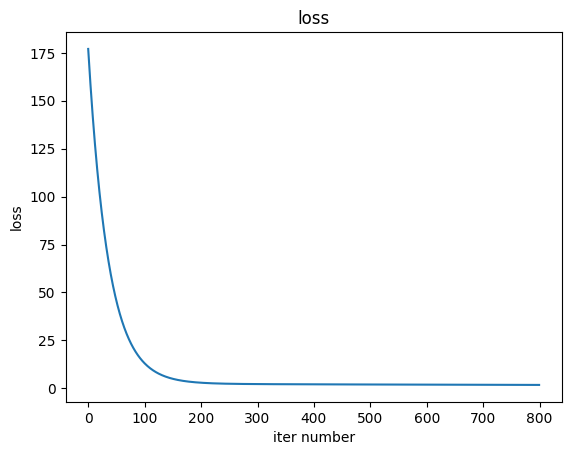

In [229]:

print(theta)

figure, ax  = plt.subplots(1, 1)  #그림과 좌표측
ax.title.set_text('loss')
ax.plot(loss)
ax.set_ylabel('loss')
ax.set_xlabel('iter number')

print('error', j(xb, theta, y))
plt.show()